In [133]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
# mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

In [134]:
fukuidata5 = pd.read_csv('data/tblT001085C18.zip', encoding='cp932')

In [135]:
fukuidata5.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001085001,T001085002,T001085003
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,住宅に住む一般世帯,持ち家,民営借家
1,18201.0,1.0,福井市,NaN,0.0,NaN,NaN,102984,67929,28598
2,182010010.0,2.0,福井市,明里町,0.0,NaN,NaN,191,91,72
3,182010030.0,2.0,福井市,足谷町,2.0,890.0,NaN,X,X,X
4,182010040.0,3.0,福井市,足羽,0.0,NaN,NaN,1201,804,270


In [136]:
fukuidata5 = fukuidata5[1:]

In [137]:
fukuidata5=fukuidata5.replace('*',np.nan)

In [138]:
fukuidata5=fukuidata5.replace('-',np.nan)

In [139]:
fukuidata5=fukuidata5.replace('X',np.nan)

In [140]:
fukuidata5 = pd.concat([fukuidata5])

In [141]:
fukuidata5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 1 to 3218
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    3218 non-null   float64
 1   HYOSYO      3218 non-null   float64
 2   CITYNAME    3218 non-null   object 
 3   NAME        3201 non-null   object 
 4   HTKSYORI    3218 non-null   float64
 5   HTKSAKI     67 non-null     float64
 6   GASSAN      57 non-null     object 
 7   T001085001  3070 non-null   object 
 8   T001085002  3058 non-null   object 
 9   T001085003  1851 non-null   object 
dtypes: float64(4), object(6)
memory usage: 251.5+ KB


In [142]:
fukuidata5.columns

Index(['KEY_CODE', 'HYOSYO', 'CITYNAME', 'NAME', 'HTKSYORI', 'HTKSAKI',
       'GASSAN', 'T001085001', 'T001085002', 'T001085003'],
      dtype='object')

In [143]:
fukuidata5.columns[7:]

Index(['T001085001', 'T001085002', 'T001085003'], dtype='object')

In [144]:
fukuidata5[fukuidata5.columns[7:]]

,T001085001,T001085002,T001085003
1,102984,67929,28598
2,191,91,72
3,NaN,NaN,NaN
4,1201,804,270
5,300,245,49
...,...,...,...
3214,30,30,NaN
3215,72,71,1
3216,48,46,2
3217,14,14,NaN


In [145]:
fukuidata5[fukuidata5.columns[7:]].astype(float)

,T001085001,T001085002,T001085003
1,102984.0,67929.0,28598.0
2,191.0,91.0,72.0
3,NaN,NaN,NaN
4,1201.0,804.0,270.0
5,300.0,245.0,49.0
...,...,...,...
3214,30.0,30.0,NaN
3215,72.0,71.0,1.0
3216,48.0,46.0,2.0
3217,14.0,14.0,NaN


In [146]:
fukuidata5[fukuidata5.columns[7:]]=fukuidata5[fukuidata5.columns[7:]].astype(float)

In [147]:
fukuidata5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 1 to 3218
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    3218 non-null   float64
 1   HYOSYO      3218 non-null   float64
 2   CITYNAME    3218 non-null   object 
 3   NAME        3201 non-null   object 
 4   HTKSYORI    3218 non-null   float64
 5   HTKSAKI     67 non-null     float64
 6   GASSAN      57 non-null     object 
 7   T001085001  3070 non-null   float64
 8   T001085002  3058 non-null   float64
 9   T001085003  1851 non-null   float64
dtypes: float64(7), object(3)
memory usage: 251.5+ KB


In [148]:
fukuimesh['KEY_CODE']=fukuimesh['KEY_CODE'].astype(float)

In [154]:
fukuimesh = fukuimesh.merge(fukuidata5, on='KEY_CODE')

MergeError: Passing 'suffixes' which cause duplicate columns {'HYOSYO_x', 'T001085002_x', 'T001085001_x', 'GASSAN_x', 'NAME_x', 'HTKSYORI_x', 'HTKSAKI_x', 'CITYNAME_x', 'T001085003_x'} is not allowed.

In [155]:
fukuimesh.sample(5)

ValueError: a must be greater than 0 unless no samples are taken

In [156]:
fukuimesh = fukuimesh.to_crs(3857)

c:\Users\99556\miniconda3\envs\gis\Lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

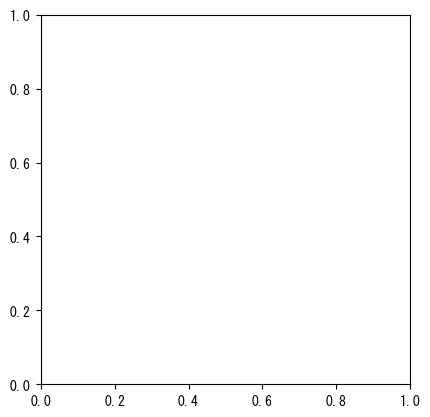

In [157]:
fukuimesh.plot(column='T001085002')